In [1]:
from reinforcement_training import *
from notebook_game_helper import *

Using Theano backend.


In [2]:
# lets train a DQN model!
# make the model
hiddens = [{"size":10,"activation":"relu"},
            {"size":10,"activation":"relu"}]
# make an optimizer
from keras.optimizers import sgd, RMSprop, Adagrad, Adadelta, Adam
# note to self: DON'T CHANGE THIS UNTIL YOU KNOW WE'RE LEARNING SOMETHING
# optimizer = sgd(lr = 0.0001)
# optimizer_str = "SGD"
# optimizer = Adagrad()
# optimizer_str = "Adagrad"
# optimizer = RMSprop()
# optimizer_str = "RMSprop"
# optimizer = Adadelta()
# optimizer_str = "Adadelta"
optimizer = Adam()
optimizer_str = "Adam"
model = baseline_model(optimizer, hiddens)

In [10]:
# prepare the game for training model
training_game_size = 10
training_game = ReinforcementNaviGame(training_game_size,
                                training_game_size,
                                model,
                                tolerance = 3,
                                goal_idle = 1)
training_game.setup()

In [11]:
training_episodes = 1000
steps = 15
# train the model
output = train_model(game = training_game,
                model = model,
                episodes = training_episodes,
                steps = steps)

Episode 999, Rewards: -1.5, Wins: 9302: 100%|██████████| 1000/1000 [00:22<00:00, 44.98it/s]


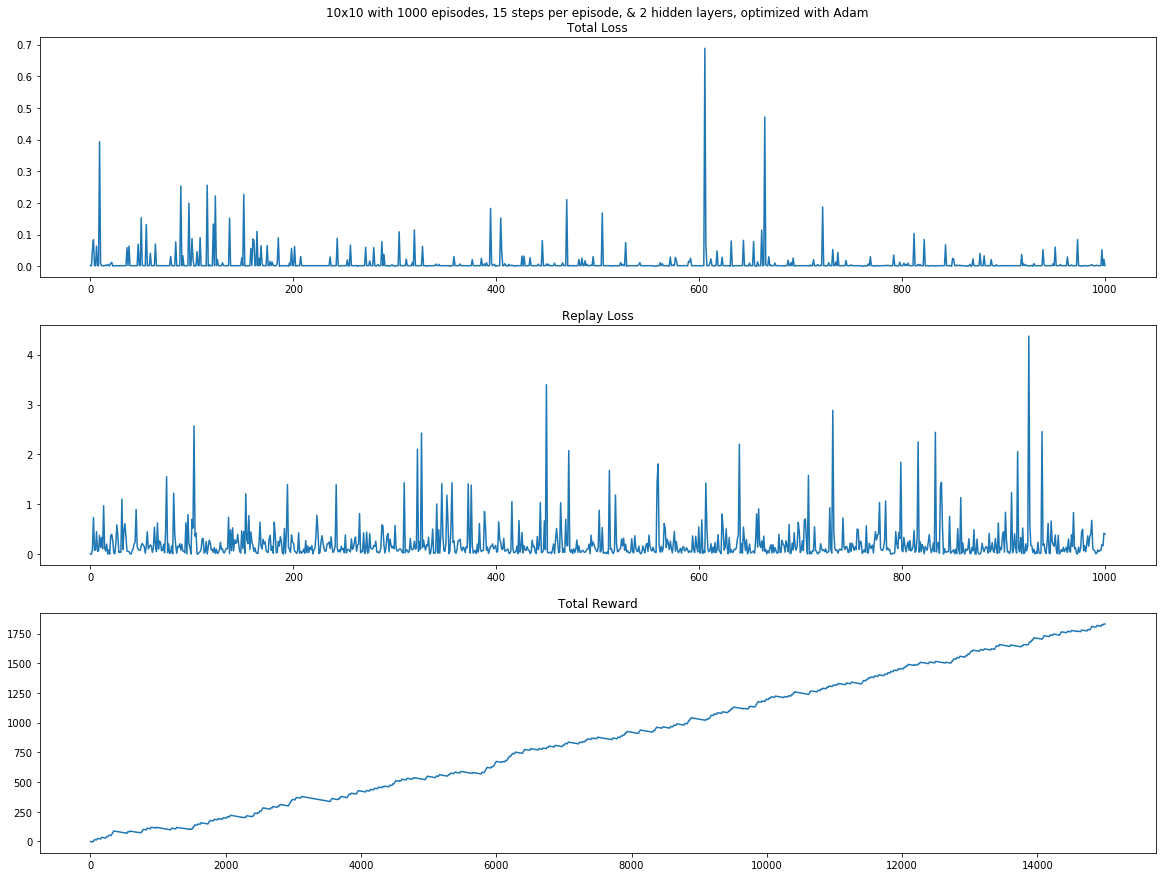

In [12]:
# plot learning info
title_str = str(training_game_size) + "x" + str(training_game_size) + " with " 
title_str += str(training_episodes) + " episodes, " + str(steps) + " steps per episode, & "
title_str += str(len(hiddens)) + " hidden layers, optimized with " + optimizer_str + "\n"
f, axarr = pl.subplots(3, 1, figsize = (20, 15))
# f.canvas.set_window_title("RL Loss, 100 eps w/ 50 steps, Look: 20")
x = np.linspace(0, len(output['log']), len(output['log']))
x2 = np.linspace(0, len(output['reward_totals']), len(output['reward_totals']))
axarr[0].plot(x, output['log'])
axarr[0].set_title(title_str + 'Total Loss')
axarr[1].plot(x, output['replays'])
axarr[1].set_title('Replay Loss')
axarr[2].plot(x2, output['reward_totals'])
axarr[2].set_title('Total Reward')
# axarr[3].plot(x, np.log(log[1]))
# axarr[3].set_title('Log Replay Loss')
f.subplots_adjust(hspace=0.2)

file_str = str(training_game_size) + "x" + str(training_game_size) + "_" 
file_str += str(training_episodes) + "_" + str(steps) + "_" + str(len(hiddens))
file_str += "_" + optimizer_str

pl.plot()
pl.savefig("rl_curve_" + file_str + ".png")
pl.show()

In [13]:
# prepare the game for validating model
val_game_size = training_game_size
val_game = ReinforcementNaviGame(val_game_size, val_game_size, model)
val_game.setup()

In [14]:
val_game.goal_idle

1

In [15]:
ipt = val_game.Navigator.strategy.get_input()
predict = val_game.Navigator.strategy.get_quality()
reward = val_game.Navigator.strategy.get_reward()
print(ipt, predict, reward)

([2, 3, 5, 5], 3.6055512754639891) [[-1.19594383 -1.37335765 -0.26540673 -1.05802548 -0.73654258]] -0.1


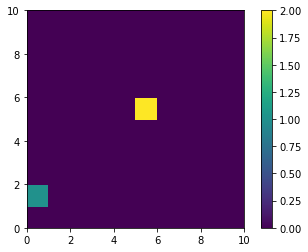

None

In [16]:
animate_game(val_game, n = 50)

In [ ]:
val_game.shift_goal()